In [1]:
from google.protobuf import text_format
from ffn.inference import inference
from ffn.inference import inference_pb2

In [2]:
config = '''image {
  hdf5: "third_party/neuroproof_examples/training_sample2/grayscale_maps.h5:raw"
}
image_mean: 128
image_stddev: 33
checkpoint_interval: 1800
seed_policy: "PolicyPeaks"
model_checkpoint_path: "models/fib25/model.ckpt-27465036"
model_name: "convstack_3d.ConvStack3DFFNModel"
model_args: "{\\"depth\\": 12, \\"fov_size\\": [33, 33, 33], \\"deltas\\": [8, 8, 8]}"
segmentation_output_dir: "results/fib25/training2"
inference_options {
  init_activation: 0.95
  pad_value: 0.05
  move_threshold: 0.9
  min_boundary_dist { x: 1 y: 1 z: 1}
  segment_threshold: 0.6
  min_segment_size: 1000
}'''
req = inference_pb2.InferenceRequest()
_ = text_format.Parse(config, req)

In [3]:
runner = inference.Runner()
runner.start(req)
canvas, alignment = runner.make_canvas((0, 0, 0), (250, 250, 250))

W0726 09:55:45.074846 140532317546240 deprecation_wrapper.py:119] From /home/dongfei/tmp/temp/ffn/inference/inference.py:833: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.

W0726 09:55:45.076553 140532317546240 deprecation_wrapper.py:119] From /home/dongfei/tmp/temp/ffn/inference/inference.py:887: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0726 09:55:45.077258 140532317546240 deprecation_wrapper.py:119] From /home/dongfei/tmp/temp/ffn/inference/inference.py:888: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0726 09:55:45.077992 140532317546240 deprecation_wrapper.py:119] From /home/dongfei/tmp/temp/ffn/inference/inference.py:889: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0726 09:55:45.265436 140532317546240 deprecation_wrapper.py:119] From /home/dongfei/tmp/temp/ffn/training/model.py:78: The name tf.placeholder is deprec

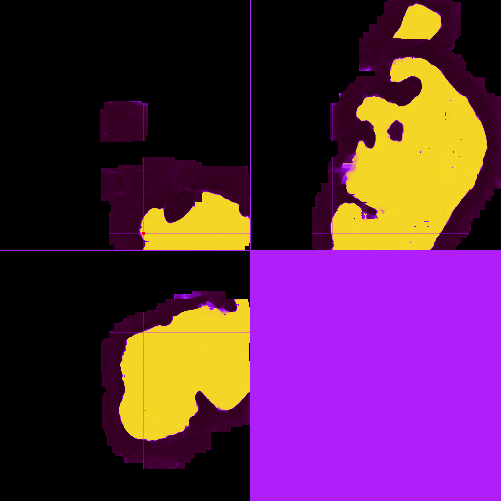

6357

In [4]:
# Create a single segment, starting from the specified origin point.
canvas.segment_at((125, 125, 125),  # zyx
                  dynamic_image=inference.DynamicImage(),
                  vis_update_every=1)